In [ ]:
# wykres x na y
# regresja liniowa
# ze wzorów teoretycznych i z bilbiotek pythonowych
# porównanie w tabeli teoretycznych vs z pythona

In [ ]:
# zad 1
# 
# a i b
# wykres
# estymator intercepta i estymator slope
# tabela
# estymator intercepta - wartość teoretyczna ; wartość z biblioteki
# estymator slope - wartość teoretyczna ; wartość z biblioteki
# dalej w tabeli to samo dla przedziałów ufności dla beta0 i beta1

# c
# dokładnie podane h0 i h1
# wzór na statystykę testową T
# rozkład T przy założeniiu, że h0 jest prawdziwe
# wartość krytyczna dla poziomu istotności alfa = 0.05
# p-wartość
# do łącznej tabeli wartość statystyki testowej T, p-wartość (znowu na dwa sposoby)
# to samo dla beta1 i beta0
# decyzję warto napisać na 2 sposoby: matematycznie (odrzucamy/nie odrzucamy h0 na poziomie istotności alfa = 0.05) + znaczenie związane z kontekstem zadania

# d) i e)
# X_k na wykładzie
# tabela - przedział ufności i przedział predykcyjny (teoretyczny i z biblioteki)

# f)
# powtórzony ten wykres z początku + przedziały ufności i predykcyjne dla poszczególnych obserwacji


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm, binom
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

import os
zad1_dir = "zad1"
os.makedirs(zad1_dir, exist_ok=True)
zad2_dir = "zad2"
os.makedirs(zad2_dir, exist_ok=True)
zad3_dir = "zad3"
os.makedirs(zad3_dir, exist_ok=True)
zad4_dir = "zad4"
os.makedirs(zad4_dir, exist_ok=True)

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
# 1
data = np.loadtxt('CH01PR20.txt')
y = data[:, 0]  # Time (hours)
x = data[:, 1]  # Number of copiers

n = len(x)
alpha = 0.05

Teoretyczne beta_0: -0.5801566579634425
Teoretyczne beta_1: 15.035248041775457
Biblioteczne beta_0: -0.5801566579634496
Biblioteczne beta_1: 15.035248041775457


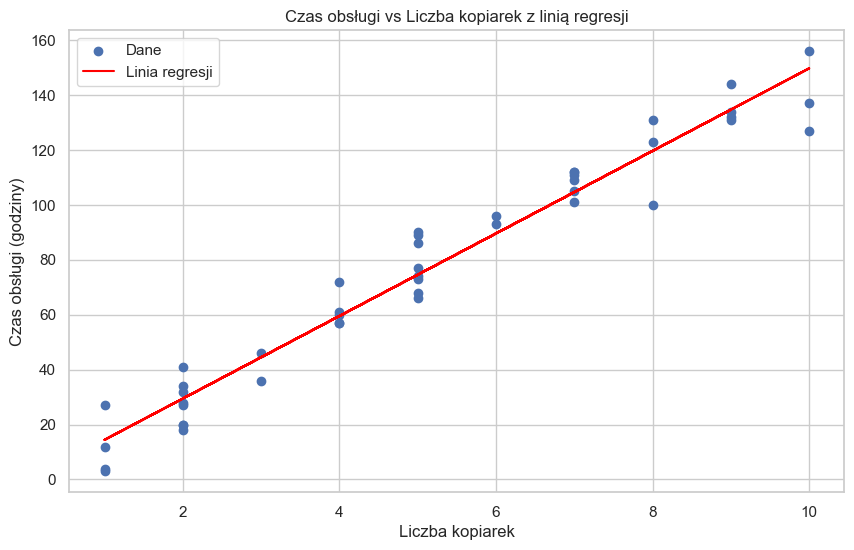

In [ ]:
# 1.a

# Theoretical
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
donominator = np.sum((x - x_mean)**2)

beta_1_teor = numerator / donominator
beta_0_teor = y_mean - beta_1_teor * x_mean

print(f"Teoretyczne beta_0: {beta_0_teor}")
print(f"Teoretyczne beta_1: {beta_1_teor}")

# Built-in
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
beta_0_lib, beta_1_lib = model.params

print(f"Biblioteczne beta_0: {beta_0_lib}")
print(f"Biblioteczne beta_1: {beta_1_lib}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dane')
plt.xlabel('Liczba kopiarek')
plt.ylabel('Czas obsługi (godziny)')
plt.title('Czas obsługi vs Liczba kopiarek (Wykres punktowy)')
plt.legend()
plt.savefig(os.path.join(zad1_dir, 'plot_a_scatter.png'))

plt.plot(x, beta_0_teor + beta_1_teor * x, color='red', label='Linia regresji')
plt.title('Czas obsługi vs Liczba kopiarek z linią regresji')
plt.legend()
plt.savefig(os.path.join(zad1_dir, 'plot_a.png'))
plt.show()

Zależność wygląda w przybiliżeniu na liniową.

Równanie regresji liniowej prostej: $y = \beta_0 + \beta_1x$

                 teor        lib
beta_0_hat  -0.580157  -0.580157
beta_1_hat  15.035248  15.035248


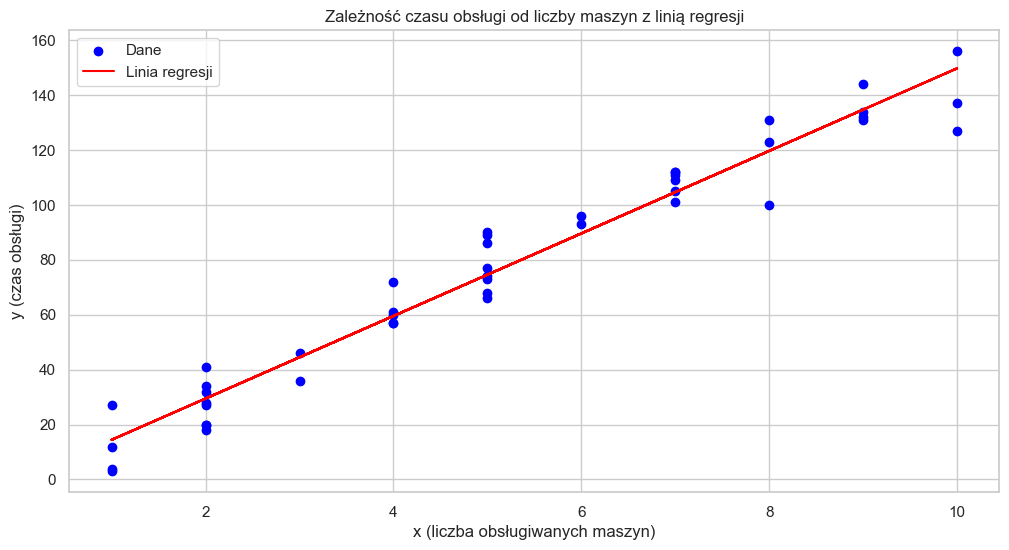

In [15]:
# a c.d.
y_mean = np.mean(y)
x_mean = np.mean(x)
n = len(x)

beta_1_hat = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
beta_0_hat = y_mean - beta_1_hat * x_mean

# z bilbioteki pythonowej (alternatywnie np.polyfit, scipy.stats.linregress, statsmodels.api.OLS, scikit-learn.LinearRegression)
#slope, intercept = np.polyfit(x, y, 1)
X_const = sm.add_constant(x) # Dodanie kolumny jedynek dla wyrazu wolnego
model = sm.OLS(y, X_const).fit()
intercept = model.params[0]
slope = model.params[1]

results['beta_0_hat'] = {'teor': beta_0_hat, 'lib': intercept}
results['beta_1_hat'] = {'teor': beta_1_hat, 'lib': slope}

# print results as dataframe
results_df = pd.DataFrame(results).T
print(results_df)

y_pred = model.predict(X_const)

# plot with regression line
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, y_pred, color='red', label='Linia regresji')
plt.xlabel('x (liczba obsługiwanych maszyn)')
plt.ylabel('y (czas obsługi)')
plt.title('Zależność czasu obsługi od liczby maszyn z linią regresji')
plt.legend()
# plt.show()
plot_filename = os.path.join(zad1_dir, f"plots_with_regression_line.png")
plt.savefig(plot_filename, bbox_inches='tight')

równanie regresji liniowej:
$y = -0.58 + 15.04*x$

In [16]:
# b) 95% przedziały ufności dla beta_0 i beta_1 - teoretyczne i z bilbioteki
from scipy.stats import t

alpha = 0.05

# teoretyczne
# beta 1
s2 = np.sum((y - (beta_0_hat + beta_1_hat * x)) ** 2) / (n - 2) 
s_beta_1 = np.sqrt(s2 / np.sum((x - x_mean) ** 2))
t_crit = t.ppf(1 - alpha/2, df=n - 2)
ci_beta_1_teor = (beta_1_hat - t_crit * s_beta_1, beta_1_hat + t_crit * s_beta_1)
print("95% Teoretyczny przedział ufności dla beta_1")
print(ci_beta_1_teor)

# beta 0
s_beta_0 = np.sqrt(s2 * ((1/n) + (x_mean**2 / np.sum((x - x_mean)**2))))
ci_beta_0_teor = (beta_0_hat - t_crit * s_beta_0, beta_0_hat + t_crit * s_beta_0)
print("95% Teoretyczny przedział ufności dla beta_0")
print(ci_beta_0_teor)

# z bilbioteki
ci_builtin = model.conf_int(alpha=alpha)
ci_builtin.columns = ['Lower 95%', 'Upper 95%']
print("95% Przedziały Ufności (z biblioteki)")
print(ci_builtin)

95% Teoretyczny przedział ufności dla beta_1
(np.float64(14.06100982665068), np.float64(16.00948625690023))
95% Teoretyczny przedział ufności dla beta_0
(np.float64(-6.234842799781703), np.float64(5.074529483854818))


AttributeError: 'numpy.ndarray' object has no attribute 'columns' and no __dict__ for setting new attributes

In [ ]:
# zad 2
# teoretycznych wyników tutaj już nie trzeba, wystarczą wyniki z biblioteki
# a) wykres punktów + regresja liniowa
# R^2 - teoretycznie + z biblioteki (jak coś jest po raz pierwszy na tej liście, to trzeba policzyć teoretycznie + z biblioteki)

# b) - nieskorelowane, gdy slope = 0.
# musi być w raporcie (znowu, jak w a)
# - H_0: beta_1 = 0, H_1: beta_1 != 0
# - Statystyka testowa F liczona teoretycznie i z bilbioteki
# - Rozkład F przy założeniiu, że H_0 jest prawdziwe
# - Wartość krytyczna dla poziomu istotności alfa = 0.05
# - p-wartość
# - Decyzja (odrzucamy/nie odrzucamy H_0 na poziomie istotności alfa = 0.05) + znaczenie związane z kontekstem zadania pisane po ludzku a nie matematycznie

# c) predykcje + przedziały predykcyjne dla kilku IQ

# d) wykres punktów + regresja liniowa + przedziały predykcyjne

# e) powtórzenie punktu a dla PH a nie dla IQ

In [ ]:
"""
Coś źle w tym opisie jest xd

1. wygeneruj wektor X (jeden dla wszystkich podpunktów)
2. Dla każdego podpunktu wygeneruj epsilony i Y
dla a i d - osobne epsilony dla każdego Y (czyli 1000 epsilonów)

Dla każdego podpunktu:
Można liczyć p wartość funkcjami z bilbioteki.
Dla każdego modelu Y dostaniemy decyzję czy odrzucamy H_0 czy nie.
No ale my wygenerowaliśmy te dane, więc wiemy patrząc na $\beta_1$,
że dla a-c H_0 jest prawdziwa,
a dla d-f H_1 jest prawdziwa.

Estymator pr odrzucenia H_0 to % przypadków gdzie H_0 odrzuciliśmy
- czyli estymator pr błędu 1-szego rodzaju


"""